In [1]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
train_path = '../chest_xray/train'
test_path = '../chest_xray/test'
val_path = '../chest_xray/val'

train_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=45,
    zoom_range=0.3
)

train_ds = train_generator.flow_from_directory(
    train_path,
    target_size=(256,256),
    class_mode='binary',
)

Found 4175 images belonging to 2 classes.


In [3]:
val_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_ds = val_generator.flow_from_directory(
    val_path,
    target_size=(256,256),
    class_mode='binary',
)

Found 1057 images belonging to 2 classes.


In [4]:
test_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_ds = test_generator.flow_from_directory(
    test_path,
    target_size=(256,256),
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (1, 1), activation='relu',padding='same',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1, 1), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
checkpoint = keras.callbacks.ModelCheckpoint(
    monitor='val_loss',
    filepath='save_data/02_image_preprocessing.hdf5',
    save_best_only=True,
    verbose=0
)

callbacks = [checkpoint]

In [7]:
use_metrics = [metrics.BinaryAccuracy(),\
                metrics.Precision(),\
                metrics.Recall()]

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=[use_metrics]
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               67109120  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

model = keras.models.load_model('save_data/02_image_preprocessing.hdf5')

Epoch 1/20
131/131 [==============================] - 89s 676ms/step - loss: 1.9207 - binary_accuracy: 0.7583 - precision: 0.8087 - recall: 0.8835 - val_loss: 0.3355 - val_binary_accuracy: 0.8344 - val_precision: 0.8408 - val_recall: 0.9579
Epoch 2/20
131/131 [==============================] - 87s 665ms/step - loss: 0.3575 - binary_accuracy: 0.8429 - precision: 0.8746 - recall: 0.9203 - val_loss: 0.3209 - val_binary_accuracy: 0.8543 - val_precision: 0.9058 - val_recall: 0.8966
Epoch 3/20
131/131 [==============================] - 87s 667ms/step - loss: 0.3110 - binary_accuracy: 0.8661 - precision: 0.8908 - recall: 0.9342 - val_loss: 0.3042 - val_binary_accuracy: 0.8553 - val_precision: 0.8629 - val_recall: 0.9566
Epoch 4/20
131/131 [==============================] - 89s 676ms/step - loss: 0.2931 - binary_accuracy: 0.8704 - precision: 0.8975 - recall: 0.9319 - val_loss: 0.2994 - val_binary_accuracy: 0.8685 - val_precision: 0.8985 - val_recall: 0.9272
Epoch 5/20
131/131 [================

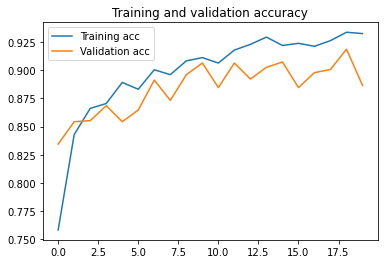

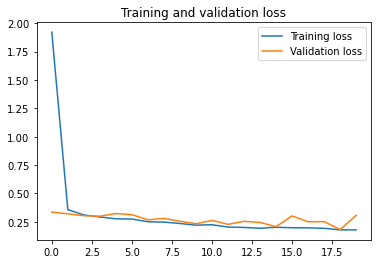

In [9]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [10]:
train_res = model.evaluate(train_ds)

131/131 [==============================] - 52s 397ms/step - loss: 0.1772 - binary_accuracy: 0.9353 - precision: 0.9478 - recall: 0.9661


In [11]:
val_res = model.evaluate(val_ds)

34/34 [==============================] - 7s 210ms/step - loss: 0.1821 - binary_accuracy: 0.9186 - precision: 0.9520 - recall: 0.9374


In [12]:
test_res = model.evaluate(test_ds)

20/20 [==============================] - 4s 185ms/step - loss: 0.3734 - binary_accuracy: 0.8638 - precision: 0.8366 - recall: 0.9718
